<a href="https://colab.research.google.com/github/arifadli/kuliahAI2021/blob/main/Logika%20Fuzzy/Model_Tsukamoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
! pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

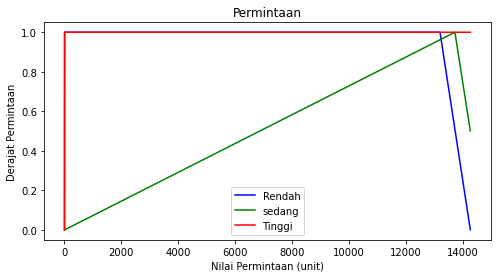

In [37]:
#membuat fungsi keanggotaan
#dari Permintaan
Permintaan_rendah = fuzz.trapmf(x_permintaan, [0, 1, 13200, 14266])
Permintaan_sedang = fuzz.trimf(x_permintaan, [0, 13724, 14808])
Permintaan_tinggi = fuzz.trapmf(x_permintaan, [0, 1, 14266, 15450])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_permintaan, Permintaan_rendah, 'b', linewidth=1.5, label='Rendah')
ax.plot(x_permintaan, Permintaan_sedang, 'g', linewidth=1.5, label='sedang')
ax.plot(x_permintaan, Permintaan_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax.set_title('Permintaan')
ax.set_xlabel('Nilai Permintaan (unit)')
ax.set_ylabel('Derajat Permintaan')
ax.legend()

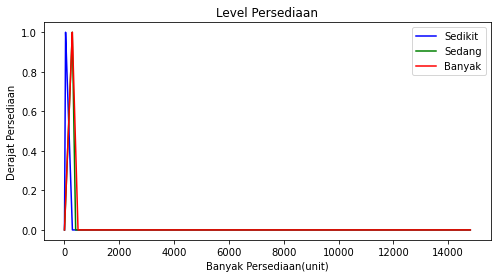

In [48]:
#membuat fungsi keanggotaan
#dari Persediaan
Persediaan_sedikit = fuzz.trimf(x_persediaan, [0,40, 285])
Persediaan_sedang = fuzz.trimf(x_persediaan, [0,285, 404])
Persediaan_banyak = fuzz.trimf(x_persediaan, [0,285, 490])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_persediaan, Persediaan_sedikit, 'b', linewidth=1.5, label='Sedikit')
ax.plot(x_persediaan, Persediaan_sedang, 'g', linewidth=1.5, label='Sedang')
ax.plot(x_persediaan, Persediaan_banyak, 'r', linewidth=1.5, label='Banyak')
ax.set_title('Level Persediaan')
ax.set_xlabel('Banyak Persediaan(unit)')
ax.set_ylabel('Derajat Persediaan')
ax.legend()

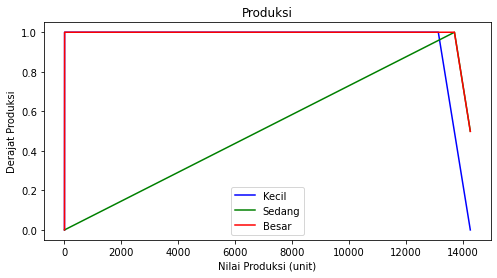

In [59]:
#membuat fungsi keanggotaan
#dari Produksi
Produksi_rd = fuzz.trapmf(x_produksi, [0, 1, 13140,14265])
Produksi_nm = fuzz.trimf(x_produksi, [0, 13709, 14820])
Produksi_tg = fuzz.trapmf(x_produksi, [0, 1, 13706, 14820])

fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
ax.plot(x_produksi, Produksi_rd, 'b', linewidth=1.5, label='Kecil')
ax.plot(x_produksi, Produksi_nm, 'g', linewidth=1.5, label='Sedang')
ax.plot(x_produksi, Produksi_tg, 'r', linewidth=1.5, label='Besar')
ax.set_title('Produksi')
ax.set_xlabel('Nilai Produksi (unit)')
ax.set_ylabel('Derajat Produksi')
ax.legend()

In [65]:
##  Crisp Input
Permintaan = 13981
Persediaan = 285

In [66]:
## Fuzzyfication #Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_permintaan, Permintaan_rendah, Permintaan))
in1.append(fuzz.interp_membership(x_permintaan, Permintaan_sedang, Permintaan))
in1.append(fuzz.interp_membership(x_permintaan, Permintaan_tinggi, Permintaan))
in2 = []
in2.append(fuzz.interp_membership(x_persediaan, Persediaan_sedikit, Persediaan))
in2.append(fuzz.interp_membership(x_persediaan, Persediaan_sedang, Persediaan))
in2.append(fuzz.interp_membership(x_persediaan, Persediaan_banyak, Persediaan))
print("Derajat Permintaan Barang")
if in1[0]>0 :
    print("Rendah : "+str(in2[0]))
if in1[1]>0 :
    print("Sedang  : "+str(in2[1]))
if in1[2]>0 :
    print("Tinggi  : "+str(in2[2]))
print("")
print("Derajat Persediaan Barang")
if in2[0]>0 :
    print("Sedikit : "+str(in1[0]))
if in2[1]>0 :
    print("Sedang  : "+str(in1[1]))
if in2[2]>0 :
    print("Tinggi  : "+str(in1[2]))

Derajat Permintaan Barang
Rendah : 0.0
Sedang  : 1.0
Tinggi  : 1.0

Derajat Persediaan Barang
Sedang  : 0.7629151291512916
Tinggi  : 1.0


In [81]:
## Rules and Inferences Tsukamoto


apred1  = np.fmin(in1[1], in2[1])
z1      = 13758*apred1 + 5000

apred2  = np.fmin(in1[0], in2[0])
z2      = 14265-(apred2)*13709

apred3  = np.fmin(in1[0], in2[1])
z3      = 14265-(apred3)*13893

apred4  = np.fmin(in1[1], in2[0])
z4      = 13758*apred4 + 14570

apred4  = np.fmin(in1[1], in2[2])
z5      = 13758*apred4 + 14570

apred4  = np.fmin(in1[0], in2[2])
z6      = 13758*apred4 + 14570

apred4  = np.fmin(in1[2], in2[0])
z7      = 13758*apred4 + 14570

apred4  = np.fmin(in1[2], in2[1])
z8      = 13758*apred4 + 14820

apred4  = np.fmin(in1[2], in2[2])
z9      = 13758*apred4 + 14820

apred4  = np.fmin(in1[1], in2[0])
z4      = 13758*apred4 + 14820

print(z1,z2,z3,z4)
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)
print("Barang yang harus di produksi : "+str(int(z)))

15496.18634686347 14265.0 10550.642589118199 14820.0
Barang yang harus di produksi : 14212
